### Question 1 - Is there a correlation between regular season winning percentage and post season winning percentage?

In [23]:
# Dependencies and Setup
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import requests
import numpy as np


from nba_api.stats.static import teams
from nba_api.stats.endpoints import teamyearbyyearstats

### Find team data through nba_api python module
https://github.com/swar/nba_api/blob/master/docs/table_of_contents.md

In [2]:
#Get Team ID
team_data = pd.DataFrame.from_dict(teams.find_teams_by_full_name('magic'))
team_id = team_data.loc[0,'id']
print(f"Magic Team ID: {team_id}")

Magic Team ID: 1610612753


In [16]:
#Get teamyearbyyearstats for the Magic
team_years = teamyearbyyearstats.TeamYearByYearStats(per_mode_simple='Totals'
                                                     ,season_type_all_star='Regular Season'
                                                     ,team_id=team_id)
df = team_years.get_data_frames()[0]
df.to_csv('orl_teamyears.csv')

## Line and Pie Charts

### Correlation - Regular season winning percentage vs number of games played in the playoffs during playoff years

In [6]:
# Genrate dataframe to only contain years in the playoffs
playoff_df = df.loc[(df['PO_WINS'] > 0) | (df['PO_LOSSES'] > 0)].copy()
playoff_df.head()

,TEAM_ID,TEAM_CITY,TEAM_NAME,YEAR,GP,WINS,LOSSES,WIN_PCT,CONF_RANK,DIV_RANK,...,OREB,DREB,REB,AST,PF,STL,TOV,BLK,PTS,PTS_RANK
4,1610612753,Orlando,Magic,1993-94,82,50,32,0.610,4,2,...,1177,2356,3533,2070,1713,683,1327,456,8666,6
5,1610612753,Orlando,Magic,1994-95,82,57,25,0.695,1,1,...,1149,2457,3606,2281,1726,672,1297,488,9091,1
6,1610612753,Orlando,Magic,1995-96,82,60,22,0.732,2,1,...,966,2401,3367,2080,1709,663,1160,406,8571,3
7,1610612753,Orlando,Magic,1996-97,82,45,37,0.549,7,3,...,1071,2221,3292,1689,1643,694,1250,363,7719,25
9,1610612753,Orlando,Magic,1998-99,50,33,17,0.660,1,1,...,688,1445,2133,1067,935,496,819,213,4473,22


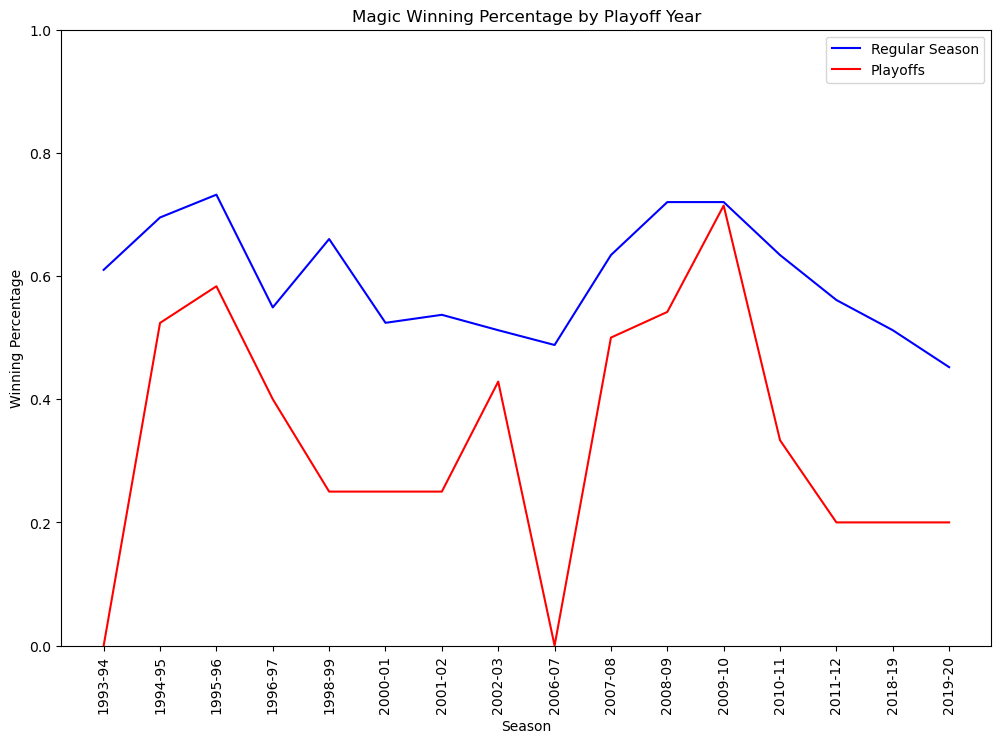

In [25]:
#Generate Line Chart of winning percentage by playoff year
plt.figure(figsize=(12,8))

magic_pct, = plt.plot(playoff_df.loc[:,'YEAR']
                     ,playoff_df.loc[:,'WIN_PCT']
                     ,color='blue'
                     ,label='Regular Season')

playoff_pct, = plt.plot(playoff_df.loc[:,'YEAR']
                       ,playoff_df.loc[:,'PO_WINS']/(playoff_df.loc[:,'PO_WINS'] + playoff_df.loc[:,'PO_LOSSES'])
                       ,color='red'
                       ,label='Playoffs')

plt.legend(handles=[magic_pct, playoff_pct], loc='best')
plt.title("Magic Winning Percentage by Playoff Year")
plt.xlabel("Season")
plt.ylabel("Winning Percentage")
plt.ylim(0, 1)
plt.xticks(rotation='vertical', color='black')

plt.savefig('orl_win_pct_history.png')
plt.show()

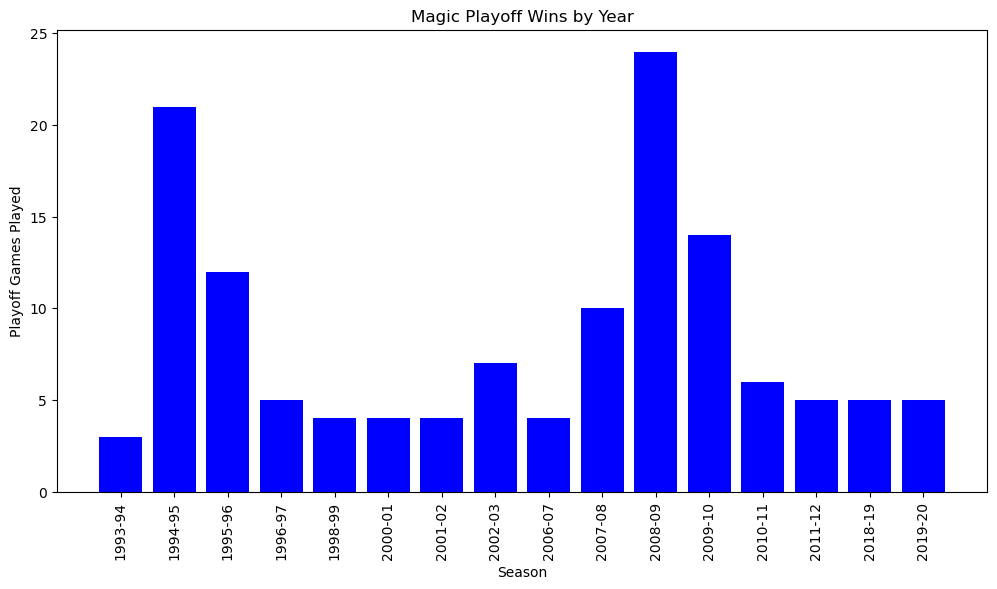

In [26]:
#Magic Bar Chart
plt.figure(figsize=(12,6))

x_axis = np.arange(len(playoff_df))
tick_locations = [value for value in x_axis]
tick_values = [r for r in playoff_df.loc[:,'YEAR']]

plt.bar(x_axis
       ,playoff_df.loc[:,'PO_WINS'] + playoff_df.loc[:,'PO_LOSSES']
       ,color='blue'
       )

plt.xticks(tick_locations
           ,tick_values
          ,rotation='vertical'
          )

plt.title("Magic Playoff Wins by Year")
plt.xlabel("Season")
plt.ylabel("Playoff Games Played")

plt.savefig('orl_playoff_history.png')
plt.show()


## Correlation

In [88]:
# Set populations
reg_season_df = playoff_df[['YEAR','WIN_PCT']].copy()
reg_season_df['YEAR'] = pd.to_numeric(reg_season_df['YEAR'].str.slice(0,4)) 

playoff_df['PO_WIN_PCT'] = round(playoff_df['PO_WINS']/(playoff_df['PO_WINS'] + playoff_df['PO_LOSSES']),3)
playoff_pct_df = playoff_df[['YEAR','PO_WIN_PCT']].copy()
playoff_pct_df['YEAR'] = pd.to_numeric(playoff_pct_df['YEAR'].str.slice(0,4))

st.ttest_ind(reg_season_df, playoff_pct_df)


Ttest_indResult(statistic=array([0.        , 4.65776081]), pvalue=array([1.00000000e+00, 6.11315173e-05]))